### Exercício 4

#### Pratica 1 -  Dataset 2D (datasets/2d_dataset.csv)

#### Descricao

Atributos

- alpha (numérico): valor x
- beta (numérico): valor y
- y (0 ou 1, numérico): classe

Etapas:
1. Importe as bibliotecas necessárias para analise dos dados
```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
```
2. Carregue o Dataset em um DataFrame
```python
df = pd.read_csv('datasets/2d_dataset.csv')
```
3. Treine modelos, através da abordagem de holdout, de:
    1. kNN (efetuando as etapas de preprocessamento necessárias e a devida otimização de parametros, k entre 10 a 100)
    3. Random Forest (efetuando as etapas de preprocessamento necessárias e a devida otimização de parametros)
4. Compare os classificadores através da curva ROC e AUC

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('datasets/2d_dataset.csv')

In [22]:
df.describe()

,y,alpha,beta
count,2994.000000,2994.000000,2994.000000
mean,0.656981,500.917502,501.393454
std,0.474797,289.387318,286.933215
min,0.000000,0.000000,0.000000
25%,0.000000,248.000000,256.000000
50%,1.000000,505.500000,499.000000
75%,1.000000,755.000000,749.000000
max,1.000000,998.000000,999.000000


In [23]:
from sklearn.preprocessing import MaxAbsScaler

label = np.array(df.y)
features = np.array(df.drop(['y'], axis = 1))

scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizado = scaler.transform(features)

In [24]:
from sklearn.model_selection import train_test_split

trainFeatures, testeFeatures, trainLabel, testLabel = train_test_split(featuresNormalizado, label, train_size = 0.7, random_state = 42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(trainFeatures, trainLabel)

RandomForestClassifier()

In [26]:
predictProbaForest = forest.predict_proba(testeFeatures)

In [27]:
predictProbaForest

array([[0.92, 0.08],
       [0.59, 0.41],
       [0.01, 0.99],
       ...,
       [0.57, 0.43],
       [0.43, 0.57],
       [0.94, 0.06]])

In [28]:
from sklearn.metrics import roc_curve

fprForest, tprForest, limiarForest = roc_curve(testLabel, predictProbaForest[:,1], pos_label=1)

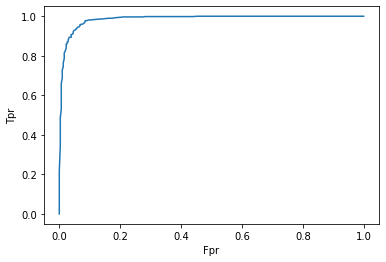

In [29]:
plt.plot(fprForest, tprForest)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(trainFeatures, trainLabel)

DecisionTreeClassifier()

In [31]:
predictProbaTree = tree.predict_proba(testeFeatures)

In [32]:
fprTree, tprTree, limiarTree = roc_curve(testLabel, predictProbaTree[:,1], pos_label=1)

Text(0, 0.5, 'Tpr')

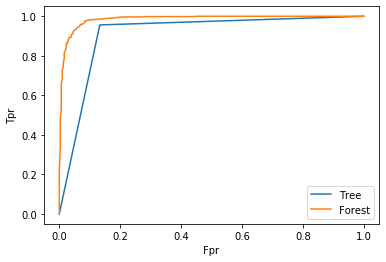

In [33]:
plt.plot(fprTree, tprTree)
plt.plot(fprForest, tprForest)
plt.legend(['Tree', 'Forest'])
plt.xlabel('Fpr')
plt.ylabel('Tpr')

In [34]:
set(limiarTree)

{0.0, 1.0, 2.0}

In [35]:
from sklearn.metrics import auc

auc(fprForest, tprForest)

0.9856121036324083

#### Pratica 2 -  Dataset Titanic (datasets/titanic.csv)

#### Descricao

Problema

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Atributos

- survival (0 = No, 1 = Yes)
- pclas: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex: Sex	
- sibsp: # of siblings / spouses aboard the Titanic	
- parch: # of parents / children aboard the Titanic	
- ticket: Ticket number	
- fare: Passenger fare	
- cabin: Cabin number	
- embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Etapas, fazendo a devida otimização de parametros:
1. Utilizando a abordagem de holdout (70% para treinamento, 30% para teste), fazendo uso do ponto de operação com a generalização e determine o melhor classificador

####  Pratica 3 -  Detecção de Emprestimo Bancário (datasets/loan.csv)

#### Descricao

Problema

The classification goal is to predict the likelihood of a liability customer buying personal loans.

Atributos

- Age : Customer's age in completed years
- Experience : #years of professional experience
- Income : Annual income of the customer
- Family : Family size of the customer
- Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage : Value of house mortgage if any.
- Securities Account : Does the customer have a securities account with the bank?
- CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
- Online : Does the customer use internet banking facilities?
- Credit card : Does the customer use a credit card issued by
- class: made loan (0=no, 1=yes)

Etapas, fazendo a devida otimização de parametros:
1. Utilizando a abordagem de holdout (70% para treinamento, 30% para teste), fazendo uso do ponto de operação com a generalização, determine:
    - O melhor classificador para detecção do dígito de empréstimos

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [37]:
df = pd.read_csv("datasets/digit.csv")

In [38]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [39]:
label = np.array(df['label'])
df = df.drop(['label'], axis = 1)
#df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [40]:
features = np.array(df)

In [41]:
scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizado = scaler.transform(features)

In [42]:
featuresTreino, featuresTeste, labelTreino, labelTeste = train_test_split(featuresNormalizado, label, train_size = 0.7, random_state = 42)

In [43]:
listaErroTreino = []
listaErroTeste =[]

for i in range(200,1,-20):
    # i =Quantos parâmetros ele precisa ver em cada folha, 
    #quanto maior, mais 'overfitting' pode acontecer
    
    tree = DecisionTreeClassifier(min_samples_split= i)
    tree.fit(featuresTreino, labelTreino)

    predicaoTreino = tree.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoTreino)
    erroTreino = (1 - accTreino)
    
    predicaoTeste = tree.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoTeste)
    erroTeste =(1- accTeste)
    
    #listaErroTreino.append(predicaoTreino)
    listaErroTreino.append(erroTreino)
    
    #listaErroTeste.append(predicaoTeste)
    listaErroTeste.append(erroTeste)  

In [44]:
listaErroTreino

[0.18915609374468523,
 0.1788156059729923,
 0.17429164257287666,
 0.1633729038402667,
 0.1560597299227865,
 0.14629749311201057,
 0.13337188339739448,
 0.11922174223613047,
 0.0985407666927447,
 0.06802952481376923]

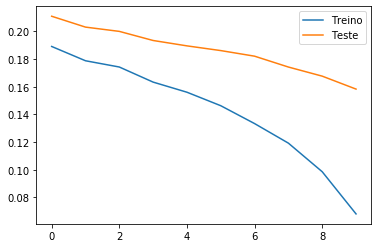

In [45]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [46]:
tree = DecisionTreeClassifier(min_samples_split= 20)
tree.fit(featuresTreino, labelTreino)

DecisionTreeClassifier(min_samples_split=20)

In [47]:
predicaoTeste = tree.predict(featuresTeste)

confusion_matrix(labelTeste, predicaoTeste)

tpr = matrix[0][0] / matrix[0].sum()
fnr = matrix[0][1] / matrix[0].sum()
tnr = matrix[1][1] / matrix[1].sum()
fpr = matrix[1][0] / matrix[1].sum()

NameError: name 'matrix' is not defined

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(labelTeste, predicaoTeste), display_labels=[range(0,10)]).plot(values_format= 'd')

In [ ]:
#"Confianças"
predictTreeProba = tree.predict_proba(featuresTeste)

#Confiança da primeira instância
#tree.predict_proba(featuresTeste)[0]

In [ ]:
"pos_label =  classe de 'interesse'"
fprTree, tprTree, limiarTree = roc_curve(labelTeste, predictTreeProba[:,3], pos_label=3)

In [ ]:
plt.plot(fprTree, tprTree)
plt.legend(['Decision Tree'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#Limiar = qual é a fronteira de decisão usada pelo classificador
set(limiarTree)

In [ ]:
auc(fprTree, tprTree)

####  Pratica 4 -  Detecção de Números (datasets/digit.csv)

#### Descricao

Problema

Detecção de imagens com números (0 a 9) escritos a mão.

Atributos

- Label (0,1,2,3,4,5,6,7,8,9)
- pixel0
- pixel1
- ...
- pixel783

Etapas, fazendo a devida otimização de parametros:
1. Utilizando a abordagem de holdout (70% para treinamento, 30% para teste), fazendo uso do ponto de operação com a generalização, determine:
    - O melhor classificador para detecção dos números
    - O melhor classificador para detecção do dígito '3'